Import Libraries


In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
# Import matplotlib for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization
import seaborn as sns
sns.set(style="whitegrid")   # Set the style for seaborn plots
# Import functions for splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# Import Linear Regression model from sklearn for regression analysis
from sklearn.linear_model import LinearRegression
# Import evaluation metrics for model performance assessment
from sklearn.metrics import auc , roc_curve , accuracy_score,confusion_matrix,classification_report,roc_auc_score,f1_score,recall_score
# Import StandardScaler for feature scaling to standardize the dataset
from sklearn.preprocessing import StandardScaler
# Import LocalOutlierFactor for detecting outliers in the dataset
from sklearn.neighbors import LocalOutlierFactor
# Import Logistic Regression model from sklearn for classification tasks
from sklearn.linear_model import LogisticRegression
# Import SMOTE (Synthetic Minority Over-sampling Technique) for addressing class imbalance in datasets
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from tabulate import tabulate

Load The DataSet

In [2]:
# loading the data set
df = pd.read_csv(r"C:\Users\91812\OneDrive\Desktop\creditcard.csv")

Display the data

In [3]:
#it displays all the dataset from csv
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# provides descriptive statistics of the numerical columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data Types

In [5]:
# display the information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

MISSING VALUES

In [6]:
#identifies missing values from dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

DISTRIDUTIONOF CLASS VARIABLES

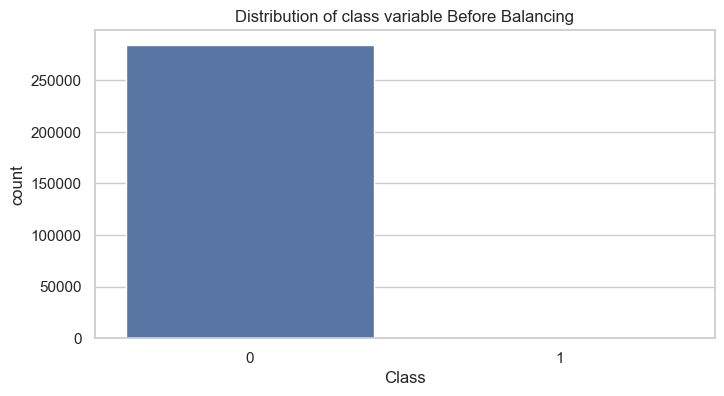

Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
#Distribution of class variable Before Balancing
target_variable = 'Class'
plt.figure(figsize=(8, 4))
sns.countplot(x=target_variable, data=df)
plt.title('Distribution of class variable Before Balancing')
plt.show()
print(df[target_variable].value_counts())

OUTLIERS

In [8]:
#Identifying outliers
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

#Define outliers Limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identify Outliers
outliers_iqr = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

#Display Outliers
print("Outliers identified by (IQR):")
print(outliers_iqr)

#count number of outliers
print("Number of outliers using IQR method:", outliers_iqr.shape[0])

Outliers identified by (IQR):
            Time        V1        V2        V3        V4        V5        V6  \
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20          16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51          36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64          42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
85          55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
...          ...       ...       ...       ...       ...       ...       ...   
284735  172727.0 -1.661169 -0.565425  0.294268 -1.549156 -2.301359  2.365956   
284748  172738.0  1.634178 -0.486939 -1.975967  0.495364  0.263635 -0.713049   
284753  172743.0  1.465737 -0.618047 -2.851391  1.425282  0.893893 -0.958325   
284757  172745.0 -1.757643 -0.982659  1.091540 -1.409539 -0.662159  0.046930   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

         

REMOVING OUTLIERS

In [9]:
#Removal of outliers identified by IQR
df_no_outliers_iqr = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

#check the shape of new DataFrame
print("original dataset shape:", df.shape)
print("New dataset shape after removing IQR outliers:" ,df_no_outliers_iqr.shape)

original dataset shape: (284807, 31)
New dataset shape after removing IQR outliers: (252903, 31)


BEFORE AND AFTER OUTLIER REMOVAL

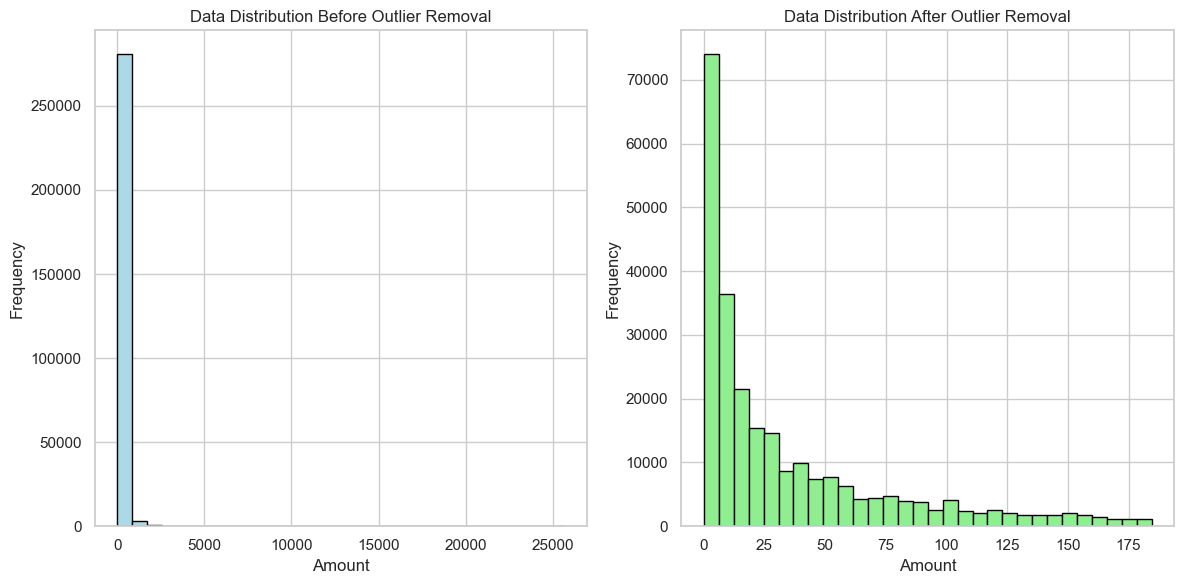

In [10]:
#visualizing Data Distribution : Before and After Outlier Removal

#plot histogram before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=30, color='lightblue', edgecolor='black')
plt.title('Data Distribution Before Outlier Removal')
plt.xlabel('Amount')
plt.ylabel('Frequency')

#plot histogram after removing outliers
plt.subplot(1, 2, 2)
plt.hist(df_no_outliers_iqr['Amount'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Data Distribution After Outlier Removal')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



SMOTE TECHNIQUE

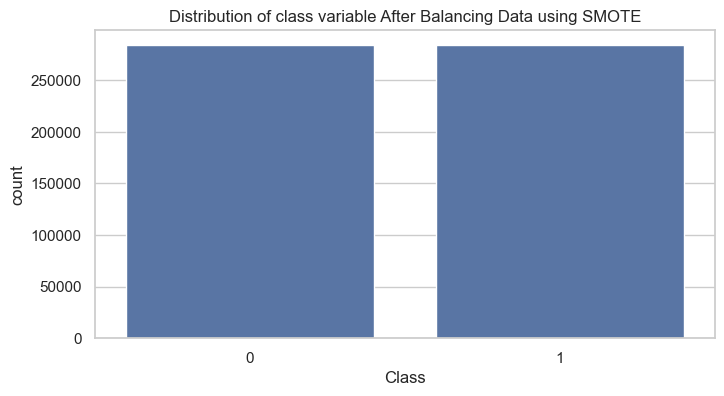

Class
0    284315
1    284315
Name: count, dtype: int64


In [11]:
#Distribution of class variable After Balancing Data using SMOTE
X = df.drop(columns = [target_variable])
Y = df[target_variable]

#Applying SMOTE
smote = SMOTE(random_state=42)
X_smote, Y_smote = smote.fit_resample(X, Y)
plt.figure(figsize=(8, 4))
sns.countplot(x=Y_smote)
plt.title('Distribution of class variable After Balancing Data using SMOTE')
plt.show()
print(Y_smote.value_counts())

UNDERSAMPLING

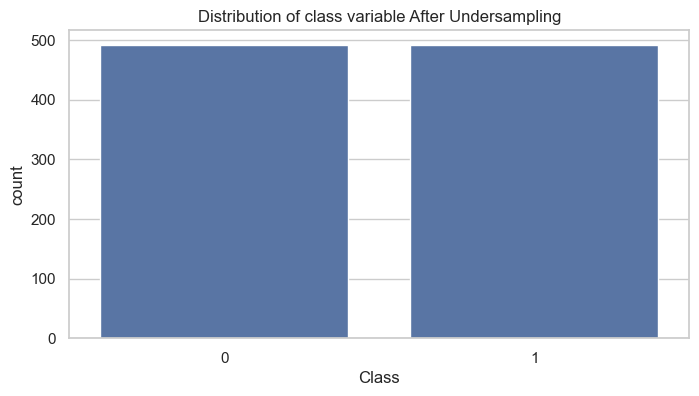

Class
0    492
1    492
Name: count, dtype: int64


In [12]:
#Distribution of class variable After Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, Y_undersampled = undersampler.fit_resample(X, Y)
plt.figure(figsize=(8, 4))
sns.countplot(x=Y_undersampled)
plt.title('Distribution of class variable After Undersampling')
plt.show()
print(Y_undersampled.value_counts())

In [13]:
#Scaling the features using SMOTE
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

LOGISTIC REGRESSION

In [14]:
#splitting the datasets for training using smote
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote_scaled, Y_smote, test_size=0.2, random_state=42)
#create a logistic regression model
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, Y_train_smote)

LogisticRegression(max_iter=1000)

SMOTE Model Confusion matrix
[[56233   517]
 [ 1723 55253]]
SMOTE Model Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



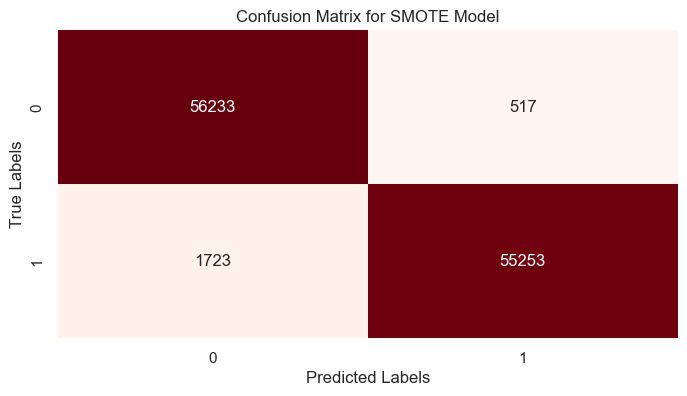

In [15]:
#Evaluating the model using SMOTE
y_pred_smote = model_smote.predict(X_test_smote)
print("SMOTE Model Confusion matrix")
# Generate and print the confusion matrix comparing true vs predicted labels
print(confusion_matrix(Y_test_smote, y_pred_smote))
print("SMOTE Model Classification Report")
# Generate and print the classification report (precision, recall, f1-score)
print(classification_report(Y_test_smote, y_pred_smote))
# Store the confusion matrix in a variable
cm_smote = confusion_matrix(Y_test_smote, y_pred_smote)
# Plot a heatmap for the confusion matrix with annotations
plt.figure(figsize=(8, 4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for SMOTE Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
#scale the features using undersampling
X_undersampled_scaled = scaler.fit_transform(X_undersampled)

In [17]:
#Build logistic model for undersampling
X_train_undersampled, X_test_undersampled, Y_train_undersampled, Y_test_undersampled = train_test_split(X_undersampled_scaled, Y_undersampled, test_size=0.2 , random_state = 42)
model_undersampled = LogisticRegression(max_iter=1000)
model_undersampled.fit(X_train_undersampled, Y_train_undersampled)

LogisticRegression(max_iter=1000)

Undersampled Model Confusion matrix
[[95  4]
 [10 88]]
Undersampled Model Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



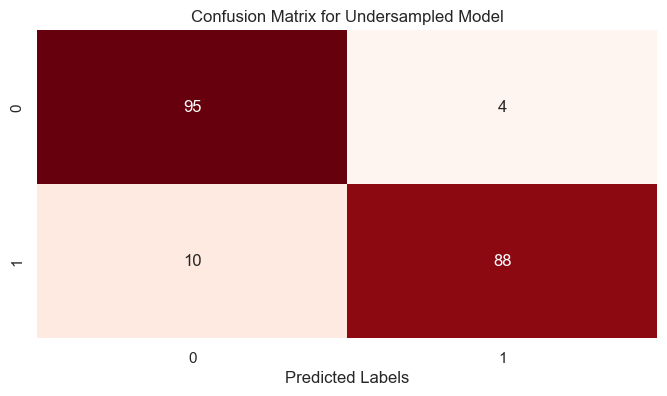

In [18]:
#Evaluating the model using Undersampling method
Y_pred_undersampled = model_undersampled.predict(X_test_undersampled)
print("Undersampled Model Confusion matrix")
print(confusion_matrix(Y_test_undersampled, Y_pred_undersampled))
print("Undersampled Model Classification Report")
print(classification_report(Y_test_undersampled, Y_pred_undersampled))

#compute the confusion matrix
cm_undersampled = confusion_matrix(Y_test_undersampled, Y_pred_undersampled)

#visualize the confusion matrix using heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cm_undersampled, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for Undersampled Model')
plt.xlabel('Predicted Labels')
plt.show()


ROC CURVE

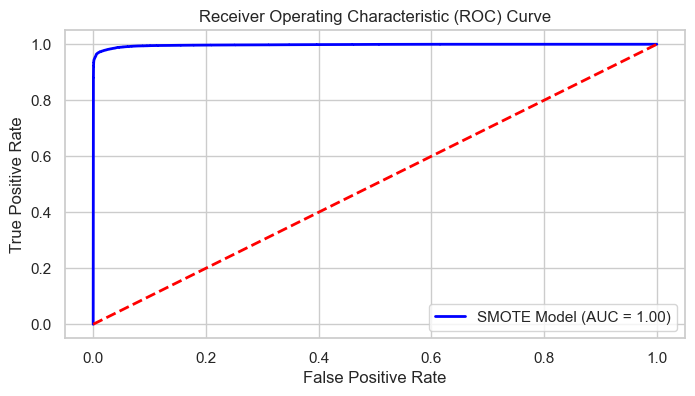

In [19]:
#ROC curve for SMOTE model
Y_prob_smote = model_smote.predict_proba(X_test_smote)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(Y_test_smote, Y_prob_smote)
auc_smote = roc_auc_score(Y_test_smote, Y_prob_smote)
plt.figure(figsize=(8, 4))
plt.plot(fpr_smote, tpr_smote, color='blue', lw=2, label='SMOTE Model (AUC = %0.2f)' % auc_smote)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


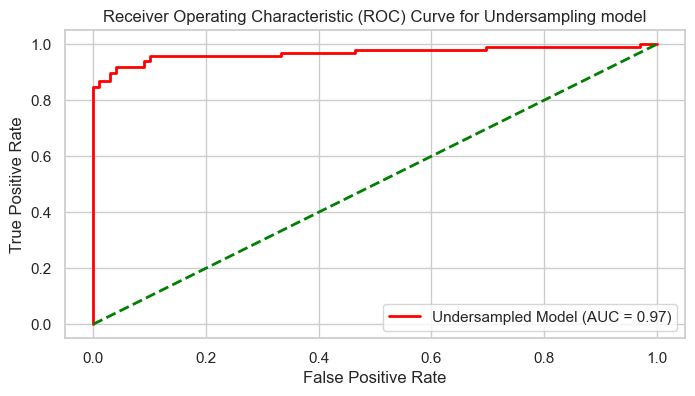

In [20]:
#ROC Curve for Undersampling model
Y_pred_undersampled = model_undersampled.predict_proba(X_test_undersampled)[:, 1]
fpr_undersampled, tpr_undersampled, thresholds_undersampled = roc_curve(Y_test_undersampled, Y_pred_undersampled)
auc_undersampled = roc_auc_score(Y_test_undersampled, Y_pred_undersampled)

plt.figure(figsize=(8, 4))
plt.plot(fpr_undersampled, tpr_undersampled, color='red', lw=2, label='Undersampled Model (AUC = %0.2f)' % auc_undersampled)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Undersampling model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

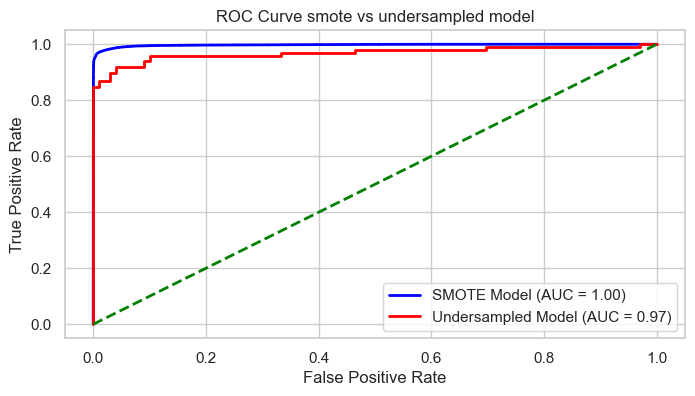

In [21]:
#ROC Curve SMOTE VS Undersampling model
plt.figure(figsize=(8, 4))
plt.plot(fpr_smote, tpr_smote, color='blue', lw=2, label='SMOTE Model (AUC = %0.2f)' % auc_smote)
plt.plot(fpr_undersampled, tpr_undersampled, color='red', lw=2, label='Undersampled Model (AUC = %0.2f)' % auc_undersampled)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve smote vs undersampled model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

OVERSAMPLING

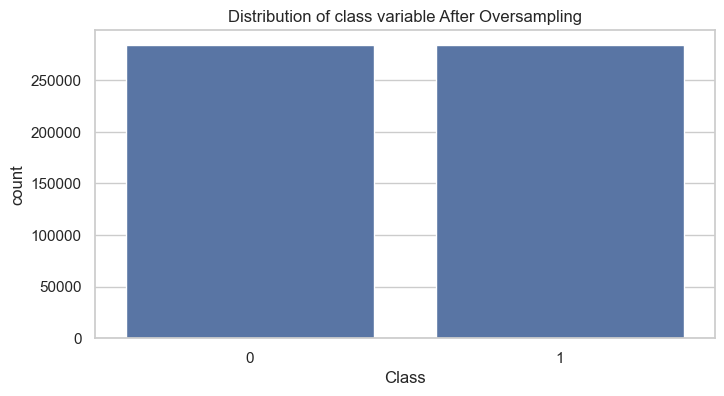

Class
0    284315
1    284315
Name: count, dtype: int64


In [22]:
#Distribution of class variable After Oversampling method
oversampler = RandomOverSampler(random_state=42)
X_oversampled, Y_oversampled = oversampler.fit_resample(X, Y)
plt.figure(figsize=(8, 4))
sns.countplot(x=Y_oversampled)
plt.title('Distribution of class variable After Oversampling')
plt.show()
print(Y_oversampled.value_counts())

In [23]:
#sacling features for Oversampling method
X_oversampled_scaled = scaler.fit_transform(X_oversampled)

In [24]:
#Training the data set and building logistic regression for Oversampling method
X_train_oversampled, X_test_oversampled, Y_train_oversampled, Y_test_oversampled = train_test_split(X_oversampled_scaled, Y_oversampled, test_size=0.2, random_state=42)
model_oversampled = LogisticRegression(max_iter=1000)
model_oversampled.fit(X_train_oversampled, Y_train_oversampled)


LogisticRegression(max_iter=1000)

Oversampled Model Confusion matrix
[[55457  1293]
 [ 4446 52530]]
Oversampled Model Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.98      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



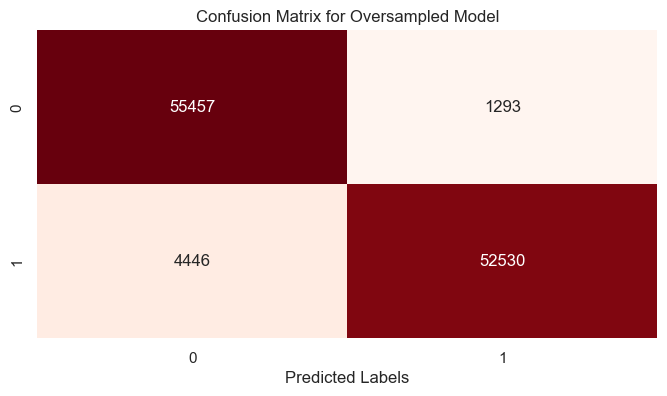

In [25]:
#Evaluating the Model using Oversampling method
Y_pred_oversampled = model_oversampled.predict(X_test_oversampled)
print("Oversampled Model Confusion matrix")
print(confusion_matrix(Y_test_oversampled, Y_pred_oversampled))
print("Oversampled Model Classification Report")
print(classification_report(Y_test_oversampled, Y_pred_oversampled))

#compute the confusion matrix
cm_oversampled = confusion_matrix(Y_test_oversampled, Y_pred_oversampled)

#visualize the confusion matrix using heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cm_oversampled, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for Oversampled Model')
plt.xlabel('Predicted Labels')
plt.show()


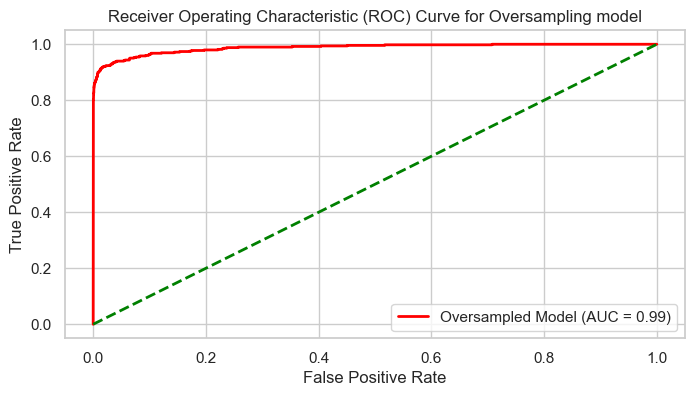

In [26]:
#ROC curve using Oversampling method
Y_prob_oversampled = model_oversampled.predict_proba(X_test_oversampled)[:, 1]
fpr_oversampled, tpr_oversampled, thresholds_oversampled = roc_curve(Y_test_oversampled, Y_prob_oversampled)
auc_oversampled = roc_auc_score(Y_test_oversampled, Y_prob_oversampled)
#visualize the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr_oversampled, tpr_oversampled, color='red', lw=2, label='Oversampled Model (AUC = %0.2f)' % auc_oversampled)
plt.plot([0,1],[0,1],color='green',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Oversampling model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

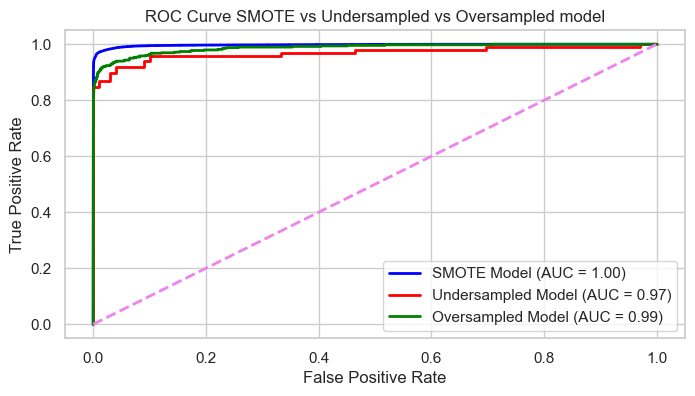

In [27]:
#ROC Curve comparsion for SMOTE VS Undersampling VS Oversampling method
plt.figure(figsize=(8,4))
plt.plot(fpr_smote,tpr_smote,color='blue',lw=2,label='SMOTE Model (AUC = %0.2f)' % auc_smote)
plt.plot(fpr_undersampled,tpr_undersampled,color='red',lw=2,label='Undersampled Model (AUC = %0.2f)' % auc_undersampled)
plt.plot(fpr_oversampled,tpr_oversampled,color='green',lw=2,label='Oversampled Model (AUC = %0.2f)' % auc_oversampled)
plt.plot([0,1],[0,1],color='violet',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SMOTE vs Undersampled vs Oversampled model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

FINAL RESULTS


In [28]:
import pandas as pd

# Create the comparison data based on the provided metrics
data = {
    'Technique': ['SMOTE', 'Undersampling', 'Oversampling'],
    'F1-Score': [0.97, 0.93, 0.9451],
    'Recall': [0.96, 0.90, 0.9176],
    'Accuracy': [0.97, 0.93, 0.9466]
}

# Create a DataFrame to hold the data
df = pd.DataFrame(data)

# Display the comparison table
print(df)


       Technique  F1-Score  Recall  Accuracy
0          SMOTE    0.9700  0.9600    0.9700
1  Undersampling    0.9300  0.9000    0.9300
2   Oversampling    0.9451  0.9176    0.9466
